In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Question 1: Load the data from “glass.csv” and make a bar plot of different types of glasses.
dataset=pd.read_csv('C:\\Neville\\Python\\Session\\Module 14\\glass.csv')

In [3]:
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
#Find the list of unique values in Type field
dataset['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

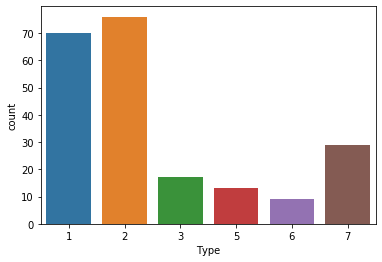

In [8]:
#Bar plot of different types of glasses
sns.countplot(data=dataset,x='Type')

In [9]:
#Check for null values
dataset.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [16]:
x=dataset.iloc[:,:-1].values

In [18]:
y=dataset.iloc[:,-1:].values

In [24]:
#Question 2: Make a train_test split and fit a single decision tree classifier.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
#Question 3: Make a k-fold split with 3 splits and measure the accuracy score with each split.
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(model,x,y,cv=3)

In [30]:
cross_val.mean()

0.5776229383087925

In [31]:
cross_val.std()

0.09223831469191807

In [33]:
cross_val

array([0.63513514, 0.61971831, 0.47826087])

In [34]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1)
model.fit(x_train,y_train)
model.predict(x_test)

C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([1, 7, 1, 7, 2, 2, 1, 2, 1, 2, 6, 6, 1, 2, 6, 5, 7, 1, 1, 7, 5, 7,
       7, 7, 2, 6, 1, 1, 2, 2, 2, 2, 1, 3, 1, 7, 5, 1, 2, 7, 5, 7, 1, 1,
       1, 6, 2, 1, 2, 2, 1, 3, 1, 2, 1, 1, 7, 1, 5, 1, 2, 2, 1, 7, 1],
      dtype=int64)

In [35]:
cross_val=cross_val_score(model,x,y,cv=3)

C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [39]:
cross_val

array([0.52702703, 0.5915493 , 0.50724638])

In [58]:
#Question 4: Use gridSearchCV from sklearn for finding out a suitable number of estimators for a RandomForestClassifer along with a 10-fold cross validation.
from sklearn.model_selection import GridSearchCV
parameters=[{'n_estimators':[55,58,59,60,61,62,65]}]
grid_search_cv=GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',n_jobs=1)

In [59]:
#Fit the model
grid_search_cv=grid_search_cv.fit(x_train,y_train)

C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda

In [60]:
#Check the parameters suggested
grid_search_cv.best_params_

{'n_estimators': 59}

In [61]:
#Check the best score suggested
grid_search_cv.best_score_

0.7583892617449665

In [72]:
#Fit the model again with Random Forest Classifier with the estimators suggested using GridSearchCV
model=RandomForestClassifier(n_estimators=60,random_state=42)

In [73]:
#Check the accuracy with 10 fold cross validation.
cross_val_score(model,x,y,cv=10).mean()

C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopherraja\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\n.christopherraja\AppDat

0.7430437919568353